In [9]:
import pandas as pd
import networkx as nx
import os
from matplotlib import pyplot as plt
%run graph_operator.py
%matplotlib inline

/Users/zhaowanhe/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [28]:
datadirectory = '/Users/zhaowanhe/Facebook' 
efnames = [datadirectory + '/' +  f for f in os.listdir(datadirectory) if 'edges' in f]
g = nx.Graph()
len(efnames)

10

In [29]:
for efname in efnames:
    ELdf = pd.read_csv(efname,sep=' ',header=None)
    eliter = ELdf.iterrows()
    for e in eliter:
        g.add_edge(*tuple(e[1]))

In [23]:
g.number_of_edges()

84243

In [7]:
gen1 = (2*x for x in range(10))
l1 = list(gen1)
l2 = [2*x for x in range(10)]

In [5]:
def gen2():
    for x in range(10):
        yield 2 * x

In [6]:
list(gen1)

[6, 8, 10, 12, 14, 16, 18]

In [30]:
graphs = list(nx.connected_component_subgraphs(g))

In [32]:
g.number_of_nodes()

3959

In [39]:
graphs.sort(key = lambda x : x.number_of_nodes(), reverse = True)
[x.number_of_nodes() for x in graphs]

[3927, 6, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]

In [40]:
g1 = GraphOperator(graphs[0], "normalized laplacian");

In [41]:
g1

Graph, cached = True

normalized laplacian

In [43]:
(A,C) = g1.partition(standardVal = 0) 

In [44]:
len(A)

730

In [45]:
len(C)

3197

NetworkXError: Node 668 has no position.

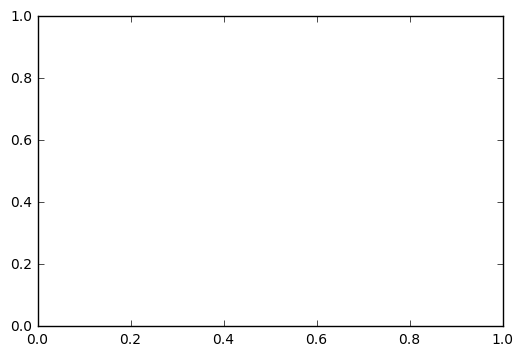

In [49]:
g1.draw_partitionGraph(A,C)

In [52]:
l = nx.spring_layout(g1._graph)

In [53]:
668 in l

False

In [54]:
len(l)

3927

In [57]:
type(A)

list

In [58]:
AC = set(A + C)

In [59]:
len(AC)

3927

In [61]:
len(AC.difference(l.keys()))

94

In [48]:
plt.scatter(A)

TypeError: scatter() takes at least 2 arguments (1 given)

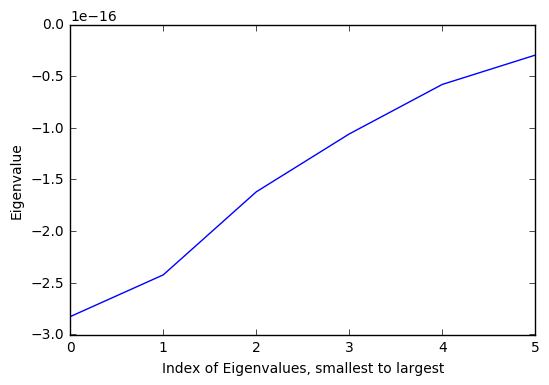

In [73]:
g1.plot_eigenvals()